<a href="https://colab.research.google.com/github/sushilXlimbu/NOTES/blob/main/CustomerDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Installing dependencies ###
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:

data = pd.read_csv('customer-data.csv', parse_dates= [1, 2]) #### Making sure that the dates columns are properly read

In [3]:

print('# of negatives in Avg Dist: '+ str(len(data.Avg_DistanceFromResturant[data.Avg_DistanceFromResturant < 0])))
#### Something seems off: How can distance be less than 0?


### Checking for negative values in other columns ###
print('# of negatives in Avg Time : '+ str(len(data.Avg_DeliveryTime[data.Avg_DeliveryTime < 0])))
print('# of negatives in Amt in last 4 weeks : '+ str(len(data['Amount in last 4 weeks'][data['Amount in last 4 weeks']< 0])))
print('# of negatives in Amt in last 7 days : '+ str(len(data['Amount in last 7 days'][data['Amount in last 7 days']< 0])))
print('# of negatives in Amount : '+ str(len(data['Amount'][data['Amount']< 0])))
print('# of negatives in  # of Orders in last 4 weeks: '+ str(len(data['# of Orders in last 4 weeks'][data['# of Orders in last 4 weeks']< 0])))


# of negatives in Avg Dist: 44
# of negatives in Avg Time : 0
# of negatives in Amt in last 4 weeks : 0
# of negatives in Amt in last 7 days : 0
# of negatives in Amount : 0
# of negatives in  # of Orders in last 4 weeks: 0


In [9]:
data.isnull().sum(axis = 0)   #### Lots of missing values in # of order in last 7 days and last 4 weeks.
### Deleting negative distances observations ###

,0
customer_id,0
First Time,0
Recent Time,0
# of Orders,0
# of Orders in last 7 days,0
# of Orders in last 4 weeks,0
Amount,0
Amount in last 7 days,0
Amount in last 4 weeks,0
Avg_DistanceFromResturant,0


In [5]:
print('# of negatives in  # of Orders in last 7 days: '+ str(len(data['# of Orders in last 7 days'][data['# of Orders in last 7 days']< 0])))
print('# of negatives in  # of Orders: '+ str(len(data['# of Orders'][data['# of Orders']< 0])))
print('# of negatives in  # of Orders in last 4 weeks: '+ str(len(data['# of Orders in last 4 weeks'][data['# of Orders in last 4 weeks']< 0])))

# of negatives in  # of Orders in last 7 days: 0
# of negatives in  # of Orders: 0
# of negatives in  # of Orders in last 4 weeks: 0


In [6]:

data.drop(data.index[data.Avg_DistanceFromResturant < 0], inplace= True)
### Replacing 'Nan' values in # of Orders in last 7 days and last 4 weeks with 0 ###
data['# of Orders in last 7 days'][data['# of Orders in last 7 days'].isnull()] = 0
data['# of Orders in last 4 weeks'][data['# of Orders in last 4 weeks'].isnull()] = 0
### Validating the preprocessing ###
print('# of negatives in Avg Dist: '+ str(len(data.Avg_DistanceFromResturant[data.Avg_DistanceFromResturant < 0])))
print(data.isnull().sum(axis = 0))
### Let's do some more exploration ###


## Let's see if there is any correlation between the data in last week and that in last 4 weeks ##
corr_order = data['# of Orders in last 7 days'].corr(data['# of Orders in last 4 weeks'])
print('Correlation between # of orders in last 7 days and this in last 4 weeks: '+ str(corr_order))
corr_amt = data['Amount in last 7 days'].corr(data['Amount in last 4 weeks'])
print('Correlation between amount in last 7 days and this in last 4 weeks: '+ str(corr_amt))


data.iloc[:, [4, 5,7, 8]].corr()




# of negatives in Avg Dist: 0
customer_id                    0
First Time                     0
Recent Time                    0
# of Orders                    0
# of Orders in last 7 days     0
# of Orders in last 4 weeks    0
Amount                         0
Amount in last 7 days          0
Amount in last 4 weeks         0
Avg_DistanceFromResturant      0
Avg_DeliveryTime               0
dtype: int64
Correlation between # of orders in last 7 days and this in last 4 weeks: 0.7548762665070986
Correlation between amount in last 7 days and this in last 4 weeks: 0.7100953119892167


,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount in last 7 days,Amount in last 4 weeks
# of Orders in last 7 days,1.000000,0.754876,0.707333,0.575561
# of Orders in last 4 weeks,0.754876,1.000000,0.536090,0.747079
Amount in last 7 days,0.707333,0.536090,1.000000,0.710095
Amount in last 4 weeks,0.575561,0.747079,0.710095,1.000000


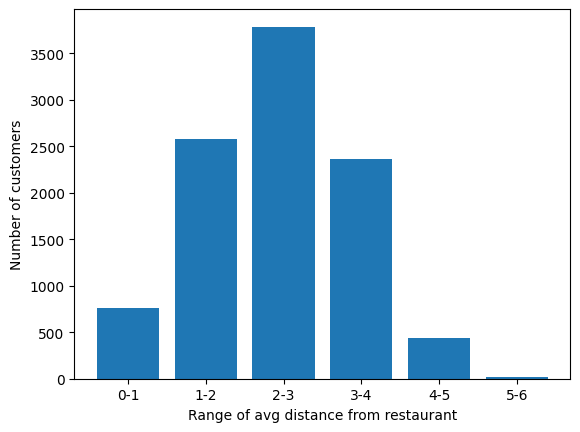

In [7]:
data['# of Order in 3 weeks before last week'] = data['# of Orders in last 4 weeks'] - data['# of Orders in last 7 days']
data['Amount in 3 weeks before last week'] = data['Amount in last 4 weeks'] - data['Amount in last 7 days']




### Maybe there are more customers at lesser distance from the restaurant ###
n_cust_dist = [len(data.customer_id[(data.Avg_DistanceFromResturant >= 0) & (data.Avg_DistanceFromResturant < 1)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 1) & (data.Avg_DistanceFromResturant < 2)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 2) & (data.Avg_DistanceFromResturant < 3)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 3) & (data.Avg_DistanceFromResturant < 4)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 4) & (data.Avg_DistanceFromResturant < 5)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 5) & (data.Avg_DistanceFromResturant < 6)])]


avg_dist = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6']
plt.bar(avg_dist, n_cust_dist)
plt.xlabel('Range of avg distance from restaurant')
plt.ylabel('Number of customers')
plt.show()

In [8]:
##Pareto Analysis
### We can also estimate the percentage of top customers (high amount spent) responsible for
### 80% (say) of the total amount ###


thre_amount = 0.8 * np.sum(data['Amount'])
cum_amt = np.cumsum(data['Amount'].sort_values(ascending = False))


print('The number of customers responsible for 80% of total amount: '+ str(sum(cum_amt <= thre_amount)))
print('The percentage of customers responsible for 80% of total amount: '+ str(sum(cum_amt <= thre_amount) * 100 /data.shape[0]))

The number of customers responsible for 80% of total amount: 2498
The percentage of customers responsible for 80% of total amount: 25.090397750100443


In [10]:
data.reset_index(inplace= True, drop= True)
temp_list = []
for i in range(0, data.shape[0]):
   temp_list.append(abs((data['Recent Time'][i] - data['Recent Time'].max()).days))


data['Recency'] = pd.Series(temp_list)

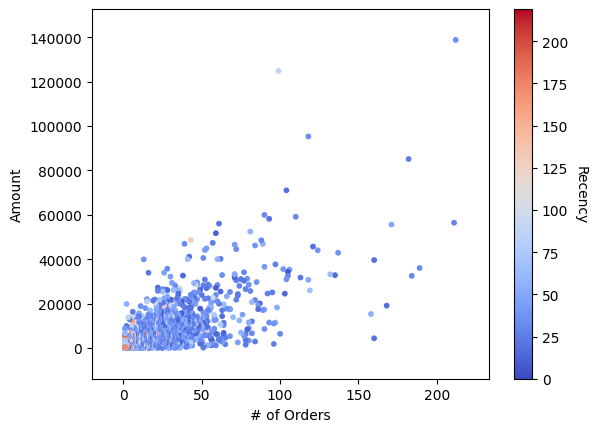

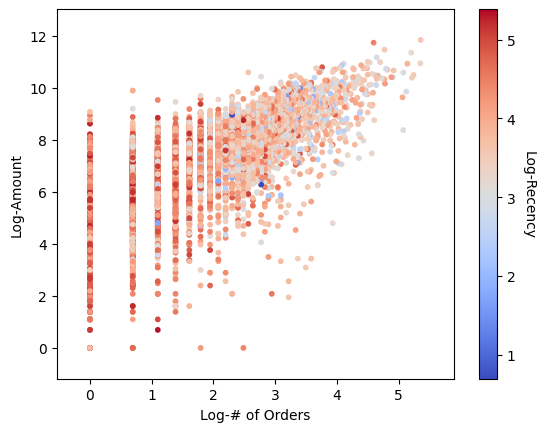

The quantiles to be used to segment the customers are as follows:


In [11]:
### Creating a new table for segmentation and visualizing ###
data_metric = data.loc[:, ['customer_id', '# of Orders', 'Amount', 'Recency']]


fig, ax = plt.subplots()
graph = ax.scatter(data_metric['# of Orders'], data_metric['Amount'], c= data_metric['Recency'], cmap='coolwarm', s=10)
cb = fig.colorbar(graph)
cb.set_label('Recency', rotation=-90, va='bottom')
ax.margins(0.1)
plt.xlabel('# of Orders')
plt.ylabel('Amount')
plt.show()


### Maybe log transformation helps in better visualization ###
fig, ax = plt.subplots()
graph = ax.scatter(np.log(data_metric['# of Orders']), np.log(data_metric['Amount']), c= np.log(data_metric['Recency']), cmap='coolwarm', s=10)
cb = fig.colorbar(graph)
cb.set_label('Log-Recency', rotation=-90, va='bottom')
ax.margins(0.1)
plt.xlabel('Log-# of Orders')
plt.ylabel('Log-Amount')
plt.show()
print('The quantiles to be used to segment the customers are as follows:')
data_metric.iloc[:, [1, 2, 3]].quantile(q=[0.25,0.5,0.75])
data_metric['q_recency'] = pd.qcut(data_metric['Recency'], q = 4, labels= [1, 2, 3, 4])
data_metric['q_monetary'] = pd.qcut(data_metric['Amount'], q = 4, labels= [1, 2, 3, 4])
data_metric['q_frequency'] = pd.qcut(data_metric['# of Orders'], q = 4, labels= [1, 2, 3], duplicates= 'drop')

In [12]:
### Scaling the variables ###
scaler_metric = StandardScaler()
data_metric.iloc[:, [1, 2, 3]] = scaler_metric.fit_transform(data_metric.iloc[:, [1, 2, 3]])

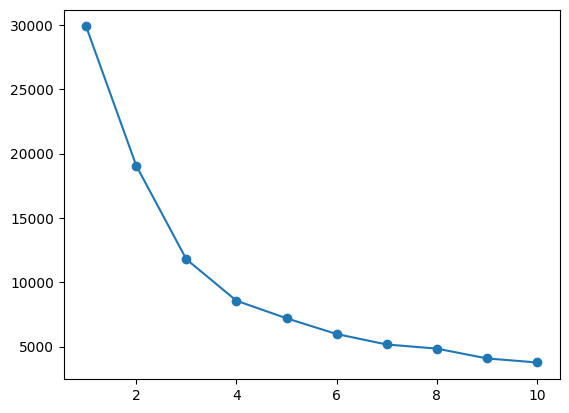

In [13]:
### Elbow Analysis to find number of clusters ###
n_clusters = range(1, 11)
cluster_sse = []
for i in n_clusters:
   kmeans = KMeans(n_clusters= i)
   kmeans.fit(data_metric.iloc[:, [1, 2, 3]])
   cluster_sse.append(kmeans.inertia_)


plt.plot(n_clusters, cluster_sse, marker = "o")
plt.show()



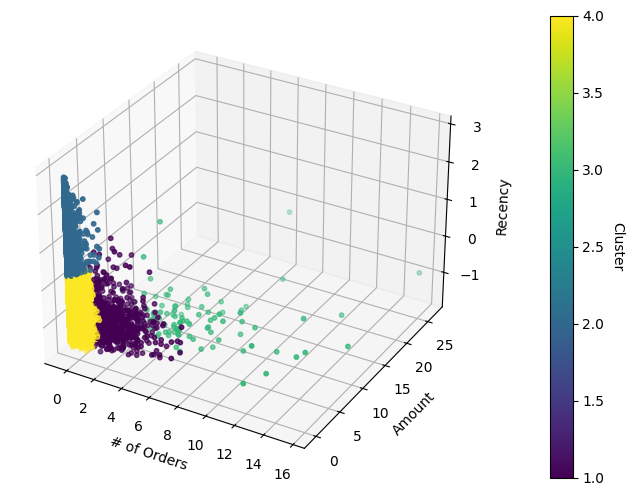

In [15]:


### Segmentation ###
km_cluster = KMeans(n_clusters = 4, random_state= 22) ## ML MODEL
data_metric['cluster'] = km_cluster.fit_predict(data_metric.iloc[:, [1, 2, 3]])


data_metric.head()
### Let's plot the data points according to their respective clusters ###
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(111, projection='3d')
graph = ax.scatter(xs = data_metric['# of Orders'], ys = data_metric['Amount'], zs = data_metric['Recency'], c= (data_metric['cluster'] + 1),zdir='z', s=10, depthshade=True)
ax.set_xlabel('# of Orders')
ax.set_ylabel('Amount')
ax.set_zlabel('Recency')
cb = fig.colorbar(graph, pad=0.1)
cb.set_label('Cluster', rotation= -90, va='bottom')
plt.show()

In [16]:
### Information about variables grouped by clusters ###
data['Cluster'] = (data_metric['cluster'] + 1)   ### to account for cluster indices, as index starts from 0 in Python
round(data.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].groupby('Cluster').mean(), 2)

,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,# of Order in 3 weeks before last week,Amount in 3 weeks before last week,Recency
Cluster,,,,,,,,,,,
1,31.53,1.29,5.81,10133.86,438.53,1979.42,2.34,37.37,4.52,1540.89,39.20
2,2.17,0.00,0.00,700.47,0.00,0.00,2.39,37.97,0.00,0.00,139.23
3,88.62,3.57,15.23,37487.98,1526.62,6134.13,2.16,37.64,11.66,4607.51,35.15
4,4.93,0.33,1.32,1437.23,101.36,403.54,2.36,36.28,0.99,302.18,52.30
